In [1]:
from environment import Environment
from agent import Agent
from trainer import Q_learning_trainer, One_step_variational_trainer, Final_variational_trainer, KL_Q_learning_trainer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters

In [3]:
N = 10000 # Number of episodes
side = 10

In [4]:
# Agent/Environment initialization

In [5]:
env = Environment.square(initial_state_range=0, side = side)

#agent = Agent(GAMMA = 1)
#agent = Agent(env, GAMMA=1, ALPHA=0.3, BETA=15, do_reward = True)
agent = Agent.timeAgent(env, GAMMA=1, ALPHA=0.1, BETA=15, do_reward = True)


OBS_LEAK = 1e-2 / env.N_obs
#trainer = Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True)
trainer = KL_Q_learning_trainer(agent, OBS_LEAK=OBS_LEAK, monte_carlo = True, final = True)
#trainer = one_step_variational_trainer(agent)
#trainer = Final_variational_trainer(agent, OBS_LEAK=OBS_LEAK, final = True, monte_carlo = True)

{0: {'E': 1, 'S': 10}, 1: {'E': 2, 'W': 0, 'S': 11}, 2: {'E': 3, 'W': 1, 'S': 12}, 3: {'E': 4, 'W': 2, 'S': 13}, 4: {'E': 5, 'W': 3, 'S': 14}, 5: {'E': 6, 'W': 4, 'S': 15}, 6: {'E': 7, 'W': 5, 'S': 16}, 7: {'E': 8, 'W': 6, 'S': 17}, 8: {'E': 9, 'W': 7, 'S': 18}, 9: {'W': 8, 'S': 19}, 10: {'E': 11, 'S': 20, 'N': 0}, 11: {'E': 12, 'W': 10, 'S': 21, 'N': 1}, 12: {'E': 13, 'W': 11, 'S': 22, 'N': 2}, 13: {'E': 14, 'W': 12, 'S': 23, 'N': 3}, 14: {'E': 15, 'W': 13, 'S': 24, 'N': 4}, 15: {'E': 16, 'W': 14, 'S': 25, 'N': 5}, 16: {'E': 17, 'W': 15, 'S': 26, 'N': 6}, 17: {'E': 18, 'W': 16, 'S': 27, 'N': 7}, 18: {'E': 19, 'W': 17, 'S': 28, 'N': 8}, 19: {'W': 18, 'S': 29, 'N': 9}, 20: {'E': 21, 'S': 30, 'N': 10}, 21: {'E': 22, 'W': 20, 'S': 31, 'N': 11}, 22: {'E': 23, 'W': 21, 'S': 32, 'N': 12}, 23: {'E': 24, 'W': 22, 'S': 33, 'N': 13}, 24: {'E': 25, 'W': 23, 'S': 34, 'N': 14}, 25: {'E': 26, 'W': 24, 'S': 35, 'N': 15}, 26: {'E': 27, 'W': 25, 'S': 36, 'N': 16}, 27: {'E': 28, 'W': 26, 'S': 37, 'N': 1

In [6]:
for i in range(N):
    trainer.run_episode()
    if i%1000 ==0:
        #plt.figure(figsize = (4, 4))
        #plt.plot(agent.KL.flatten())
        print(trainer.nb_trials)
        print("Trajectory: ", trainer.trajectory)
        print("Total reward got: %.4f" % trainer.total_reward)

1
Trajectory:  [0, 10, 10, 10, 10, 20, 21, 31, 30, 30, 30, 20, 20, 10, 10, 10, 20, 21, 20]
Total reward got: 0.0000
1001
Trajectory:  [0, 1, 2, 3, 4, 5, 15, 5, 15, 16, 17, 27, 28, 29, 39, 49, 48, 49, 59]
Total reward got: 0.0000
2001
Trajectory:  [0, 1, 2, 3, 13, 12, 22, 12, 11, 10, 10, 11, 12, 13, 3, 2, 2, 3, 3]
Total reward got: 0.0000
3001
Trajectory:  [0, 10, 10, 11, 10, 10, 20, 21, 31, 30, 31, 32, 31, 32, 42, 52, 51, 50, 40]
Total reward got: 0.0000
4001
Trajectory:  [0, 10, 10, 11, 21, 20, 21, 11, 10, 10, 10, 11, 10, 11, 1, 11, 1, 2, 12]
Total reward got: 0.0000
5001
Trajectory:  [0, 1, 0, 0, 10, 0, 1, 2, 12, 11, 12, 22, 23, 24, 25, 24, 14, 24, 34]
Total reward got: 0.0000
6001
Trajectory:  [0, 10, 11, 12, 22, 12, 13, 3, 13, 12, 2, 3, 4, 5, 15, 25, 15, 14, 4]
Total reward got: 0.0000
7001
Trajectory:  [0, 10, 11, 21, 22, 23, 24, 25, 35, 36, 37, 38, 39, 39, 49, 59, 59, 69, 79]
Total reward got: 0.0000
8001
Trajectory:  [0, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 10]
Tot

In [7]:
agent.Q_var

array([[-0.11698272, -0.10133331, -0.68044588, -0.73928224],
       [-0.09328041, -0.68216763, -0.1169257 , -0.50833032],
       [-0.0787114 , -0.13349459, -0.51270528, -0.11198085],
       [-0.07115682, -0.11910444, -0.19879938, -0.56645837],
       [-0.046018  , -0.74908963, -0.16082456, -0.12137041],
       [-0.11412096, -0.10279953, -0.78643292, -0.83957584],
       [-0.09052633, -0.12610203, -0.81347892, -0.13712599],
       [-0.58738347, -0.10498992, -0.11968262, -0.74748187],
       [-0.11675184, -0.74097696, -0.11395675, -0.79081787],
       [-0.08892725, -0.79201365, -0.10851023, -0.13242216],
       [-0.09605118, -0.13783398, -0.79706041, -0.72457267],
       [-0.07656853, -0.73492349, -0.19385024, -0.59650908],
       [-0.11318363, -0.64761242, -0.78701339, -0.79235713],
       [-0.11562812, -0.09474966, -0.78166155, -0.09797331],
       [-0.69576002, -0.07618532, -0.11494222, -0.1473625 ],
       [-0.12824818, -0.74508265, -0.11930475, -0.07106835],
       [-0.11712977, -0.

In [8]:
obs = env.get_observation()
agent.Q_var[0,:]

array([-0.11698272, -0.10133331, -0.68044588, -0.73928224])

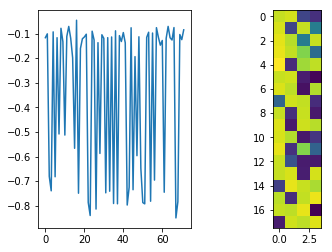

In [9]:
plt.subplot(1,2,1)
plt.plot(agent.Q_ref.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_ref)

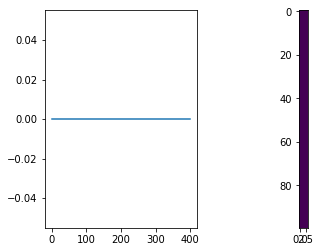

In [10]:
#print('KL', agent.KL)
plt.subplot(1,2,1)
plt.plot(agent.KL.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.KL)

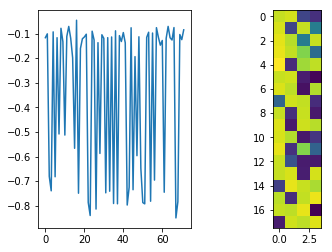

In [11]:
plt.subplot(1,2,1)
plt.plot(agent.Q_var.flatten())
plt.subplot(1,2,2)
plt.imshow(agent.Q_var)

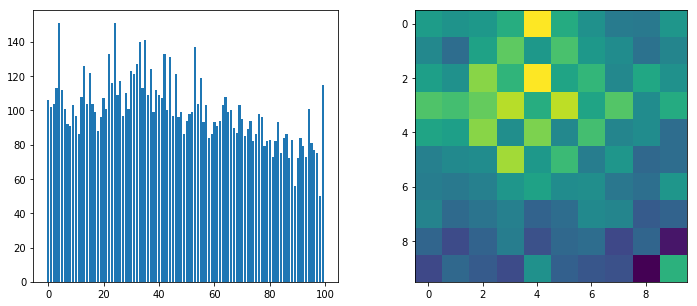

In [12]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits_final)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits_final.reshape(side,side))

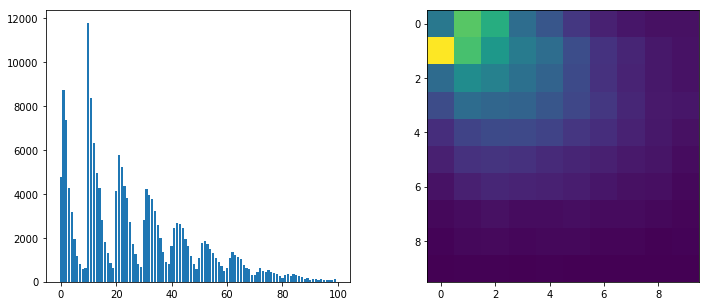

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.nb_visits)
plt.subplot(1,2,2)
plt.imshow(trainer.nb_visits.reshape(side,side))

[ 0.75453656 64.40476446 57.41189268 73.48346051 69.81771717 66.06805539
 66.98894096 61.30223974 58.53854262 75.51625955 54.37038363 71.88392852
 84.42181502 72.60546677 85.6126024  76.90447228 71.96891892 61.2213662
 59.85764645 62.3414053  63.63391546 75.70438285 79.6469458  86.90709253
 78.18974418 78.10147033 72.6806116  62.93589274 42.49502986 63.43070655
 65.08873808 74.72908602 76.68464176 78.29875714 72.91569717 79.72994217
 60.60963903 56.3474237  57.12846488 68.38127807 57.13797272 59.85136509
 72.85458344 82.51124824 75.84225828 78.7543128  71.84328985 61.90626947
 42.94097288 57.62763703 58.61722869 64.11765076 78.28478786 75.27842787
 66.66628133 67.78153609 61.28755429 62.15527123 53.47622521 60.39176452
 53.63837702 61.42338281 71.65458816 70.57105227 82.10197625 66.94303889
 72.86574489 53.84447487 58.2434779  66.1253069  55.5979805  53.10683675
 59.41818974 51.86856257 61.45168659 51.29328603 55.32652296 62.8511025
 57.57246796 50.00946702 39.61422566 47.9696668  52.0

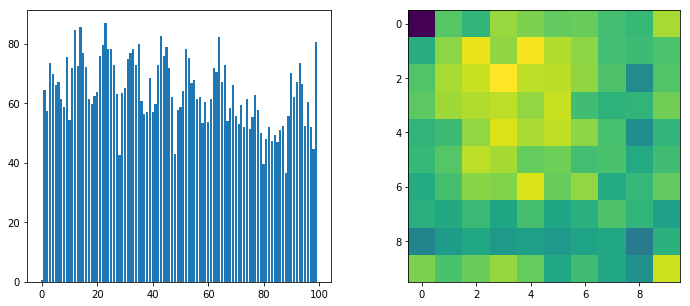

In [14]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score_final)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score_final.reshape(side,side))

[ 0.75453656 64.40476446 57.41189268 73.48346051 69.81771717 66.06805539
 66.98894096 61.30223974 58.53854262 75.51625955 54.37038363 71.88392852
 84.42181502 72.60546677 85.6126024  76.90447228 71.96891892 61.2213662
 59.85764645 62.3414053  63.63391546 75.70438285 79.6469458  86.90709253
 78.18974418 78.10147033 72.6806116  62.93589274 42.49502986 63.43070655
 65.08873808 74.72908602 76.68464176 78.29875714 72.91569717 79.72994217
 60.60963903 56.3474237  57.12846488 68.38127807 57.13797272 59.85136509
 72.85458344 82.51124824 75.84225828 78.7543128  71.84328985 61.90626947
 42.94097288 57.62763703 58.61722869 64.11765076 78.28478786 75.27842787
 66.66628133 67.78153609 61.28755429 62.15527123 53.47622521 60.39176452
 53.63837702 61.42338281 71.65458816 70.57105227 82.10197625 66.94303889
 72.86574489 53.84447487 58.2434779  66.1253069  55.5979805  53.10683675
 59.41818974 51.86856257 61.45168659 51.29328603 55.32652296 62.8511025
 57.57246796 50.00946702 39.61422566 47.9696668  52.0

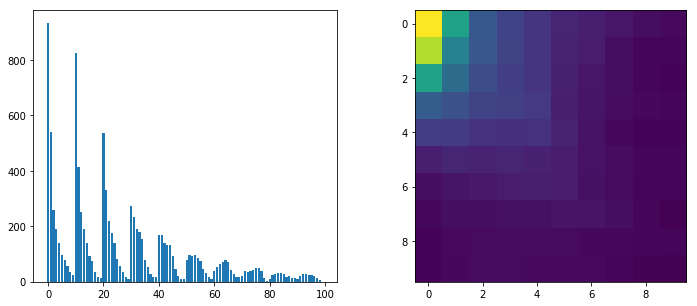

In [15]:
print(trainer.obs_score_final)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.bar(range(env.N_obs), trainer.obs_score)
plt.subplot(1,2,2)
plt.imshow(trainer.obs_score.reshape(side,side))

KeyError: 500

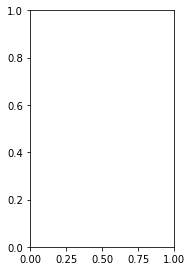

In [16]:
plt.figure(figsize=(15,20))
for i in range(1, 21):
    plt.subplot(4,5,i)
    plt.imshow(trainer.mem_V[i * N//20].reshape(side,side))

In [ ]:
trainer.mem_V